# 範例1. 使用自動微分估算簡單線性迴歸的參數(w、b)
## $ y = wx + b$

In [1]:
# 載入套件
import numpy as np 
import tensorflow as tf 

## 定義訓練函數

In [2]:
# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [3]:
# 定義預測值函數
def predict(X):
    return w * X + b    

In [4]:
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0                                # 損失函數值
    for epoch in range(epochs):                   # 執行訓練週期
        with tf.GradientTape() as t:              # 自動微分
            t.watch(tf.constant(X))               # 宣告 TensorFlow 常數參與自動微分
            current_loss = loss(y, predict(X))    # 計算損失函數值
        
        dw, db = t.gradient(current_loss, [w, b]) # 取得 w, b 個別的梯度

        # 更新權重：新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        w.assign_sub(lr * dw) # w -= lr * dw
        b.assign_sub(lr * db) # b -= lr * db

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 

## 產生隨機資料

In [5]:
# 產生線性隨機資料100筆，介於 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 資料加一點雜訊(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

In [6]:
X

array([-5.93555157, -8.64087832, -2.61358501, -3.05568019,  1.46918043,
        5.02713044, 12.6620002 , -6.11136956, -0.42579816,  0.22381173,
        3.42990435,  5.16785391,  4.43405435, 15.08609766,  6.68929865,
       -1.53913002,  4.91337896, 12.65552234,  9.96521534, 14.55313111,
        0.55078681,  3.49708645, 11.29440463, 18.88393453, 18.78106457,
       15.58684305,  6.62805299, 19.90043895, 14.14500475,  9.14882476,
       18.23678946,  9.02046089,  7.57674188,  8.22430499, 25.33765397,
       18.98320464, 23.66064001, 21.87825173, 20.0790077 , 18.83327945,
       23.77740459, 28.71170964, 13.83172857, 26.84812946, 19.92424672,
       15.05697677, 17.39784396, 14.23311914, 33.05069219, 28.67555232,
       16.38086769, 23.33360041, 25.04215371, 20.14186497, 33.03281001,
       21.29597088, 25.62267702, 30.94615785, 34.26340872, 26.98269891,
       36.7622393 , 27.58816335, 23.17817167, 28.86138021, 29.49764265,
       40.85841544, 26.79021535, 28.67079567, 28.78681441, 25.23

In [7]:
y

array([-6.35730593,  8.75450317,  9.38149025, -3.69133183, -3.5919305 ,
        3.38358356,  1.34133151,  2.99989158,  4.79007621, 12.70773049,
       -1.30331105,  8.40781321,  3.69894309,  0.93078636,  6.53014462,
       12.50183315, 12.32477885,  6.58862895, 12.13968184, 11.32311233,
        2.48426971, 15.92182599,  5.22322954, 14.41473537,  6.24000162,
       19.96601765, 15.31986392, 13.25973712,  8.72167117, 17.89972538,
       14.606792  , 13.73344839,  9.61435718, 14.41162303, 11.20364791,
        8.987982  , 23.55109179, 20.32464649, 21.43126548, 22.72124786,
       23.93020952, 18.13385504, 21.73118671, 30.81771586, 14.73863971,
       16.66409905, 32.55554285, 15.91509453, 18.92137375, 30.97144465,
       32.07253737, 29.26969688, 24.18069832, 33.24034976, 27.96347704,
       24.75962734, 29.77973944, 33.62598035, 24.1478335 , 34.98763969,
       24.97392538, 35.27606137, 30.17212857, 34.08332864, 30.97102021,
       24.62721069, 40.092378  , 37.85730165, 26.90452797, 40.61

## 執行訓練

In [8]:
# w、b 初始值均設為 0
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# w、b 的最佳解
print(f'w={w.numpy()}, b={b.numpy()}')

Epoch 0: Loss: 872.4732055664062
Epoch 1: Loss: 626.3679809570312
Epoch 2: Loss: 454.9362487792969
Epoch 3: Loss: 335.5205078125
Epoch 4: Loss: 252.3379669189453
Epoch 5: Loss: 194.3946533203125
Epoch 6: Loss: 154.0324249267578
Epoch 7: Loss: 125.91678619384766
Epoch 8: Loss: 106.3318862915039
Epoch 9: Loss: 92.68928527832031
Epoch 10: Loss: 83.18592834472656
Epoch 11: Loss: 76.56591033935547
Epoch 12: Loss: 71.9543685913086
Epoch 13: Loss: 68.74186706542969
Epoch 14: Loss: 66.50391387939453
Epoch 15: Loss: 64.94481658935547
Epoch 16: Loss: 63.858585357666016
Epoch 17: Loss: 63.10173797607422
Epoch 18: Loss: 62.574344635009766
Epoch 19: Loss: 62.20676803588867
Epoch 20: Loss: 61.950531005859375
Epoch 21: Loss: 61.7718505859375
Epoch 22: Loss: 61.64718246459961
Epoch 23: Loss: 61.560150146484375
Epoch 24: Loss: 61.499332427978516
Epoch 25: Loss: 61.456764221191406
Epoch 26: Loss: 61.426910400390625
Epoch 27: Loss: 61.40592956542969
Epoch 28: Loss: 61.391117095947266
Epoch 29: Loss: 61.3

## 顯示迴歸線

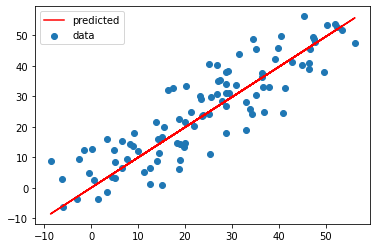

In [9]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()